# Detectando Outliers

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [34]:
df = pd.read_csv('bases/iris.data.csv', header=None, sep=',')
df.columns = ['Tam Sepala', 'Lrg Sepala', 'Tam Petala', 'Lrg Petala', 'Especies']
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
df.head()

,Tam Sepala,Lrg Sepala,Tam Petala,Lrg Petala,Especies
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Identificando Outliers pelo Diagrama de Caixa

[]

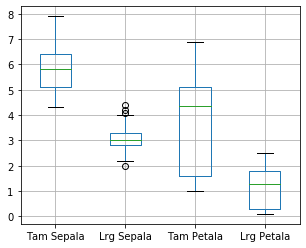

In [7]:
df.boxplot(return_type='dict')
plt.plot()

In [38]:
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
z = X_df.describe()
print(z)

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


In [44]:
# -----------------------------
# Lembrar que:
# IQR (InterQuartile Range) = 3ºQ - 1ºQ
# E outliers são definidos as observações abaixo de "Q1 − (1.5 x IQR)" ou acima de "Q3 + (1.5 x IQR)".
# -----------------------------
for t in z:
    iqr = z[t][6] - z[t][4]
    extMenor = z[t][4] - (iqr * 1.5)
    extMaior = z[t][6] + (iqr * 1.5)
    print('Em %d Outliers estão abaixo de %.2f e acima de %.2f' % (t, extMenor, extMaior))

Em 0 Outliers estão abaixo de 3.15 e acima de 8.35
Em 1 Outliers estão abaixo de 2.05 e acima de 4.05
Em 2 Outliers estão abaixo de -3.65 e acima de 10.35
Em 3 Outliers estão abaixo de -1.95 e acima de 4.05


In [13]:

print((6.4 - 5.1)*1.5)
print(5.1 - 1.95)

1.950000000000001
3.1499999999999995


In [32]:
# Isolando
lrg_sepala = X[:,1]
iris_outliers = (lrg_sepala > 4.05)
df[iris_outliers]

,Tam Sepala,Lrg Sepala,Tam Petala,Lrg Petala,Especies
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [33]:
lrg_sepala = X[:,1]
iris_outliers = (lrg_sepala < 2.05)
df[iris_outliers]

,Tam Sepala,Lrg Sepala,Tam Petala,Lrg Petala,Especies
60,5.0,2.0,3.5,1.0,Iris-versicolor
